In [1]:
import cv2
import mediapipe as mp
import numpy as np
import os
from matplotlib import pyplot as plt
import time

cap = cv2.VideoCapture(0)

In [2]:
cap

<VideoCapture 0000027D3BC53E10>

In [5]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


def mediapipe_detect(image, mp_model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = mp_model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results


def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,
                              results.face_landmarks,
                              mp_holistic.FACEMESH_TESSELATION,
                              landmark_drawing_spec=mp_drawing.DrawingSpec((255, 0, 0), 1, 1),
                              connection_drawing_spec=mp_drawing.DrawingSpec((255, 255, 255), 1, 1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,
                              results.left_hand_landmarks,
                              mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec((0, 0, 255), 2, 2),
                              connection_drawing_spec=mp_drawing.DrawingSpec((255, 255, 255), 2, 2))
    mp_drawing.draw_landmarks(image,
                              results.right_hand_landmarks,
                              mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec((0, 0, 255), 2, 2),
                              connection_drawing_spec=mp_drawing.DrawingSpec((255, 255, 255), 2, 2))


cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detect(frame, holistic)
        draw_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [6]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
len(results.pose_landmarks.landmark)

33

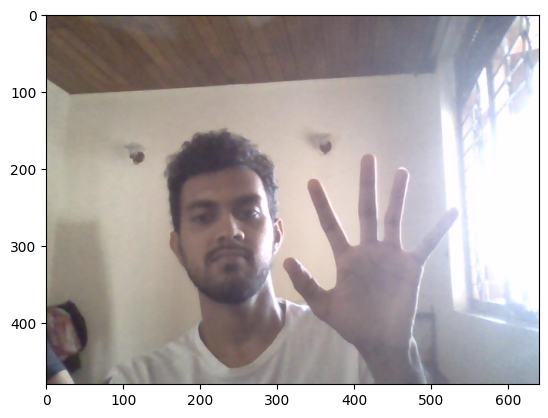

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

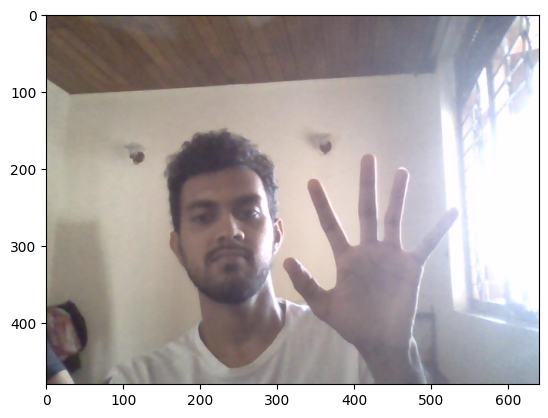

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

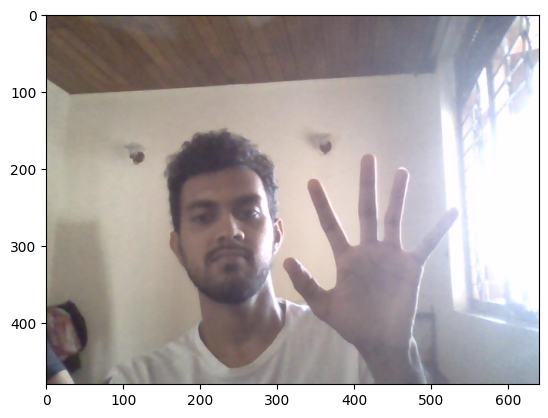

In [21]:
plt.imshow(image)